# Model Project
***

Install

In [37]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Model presentation - theoretical with formulas

Choice of optimizers.

**Algorithm:** `minimize_newton()`

Optimizer algorithm:
1. Choose tolerance $\epsilon>0$, guess on $\boldsymbol{x}_0$, compute $f(\boldsymbol{x}_0)$, and set $n=1$.
2. Compute \\(\nabla f(\boldsymbol{x}_{n-1})\\) (gradient/jacobian) and \\(\boldsymbol{H}f(\boldsymbol{x}_{n-1})\\) (hessian).
3. Compute new guess

  \\[ \boldsymbol{x}_{n} = \boldsymbol{x}_{n-1} - [\boldsymbol{H}f(\boldsymbol{x}_{n-1})]^{-1} \nabla f(\boldsymbol{x}_{n-1})  \\]

3. If $|f(\boldsymbol{x}_n)-f(\boldsymbol{x}_{n-1})| < \epsilon$ then stop.
5. Set $n = n + 1$ and return to step 2.

Model algorithm:
Solve in **four steps**:

1. **Isolate** $x_2$ from the budget constraint
2. **Substitute** in $x_2$
3. **Take the derivative** wrt. $x_1$
4. **Solve the FOC** for $x_1$

In [66]:
sm.init_printing(use_unicode=True) # for pretty printing

In [67]:
x = sm.symbols('x') # x1 is a Python variable representing the symbol x_1
A = sm.symbols('A')
f = sm.symbols('f(l)')
beta = sm.symbols('beta')
p = sm.symbols('p')
d = sm.symbols('l**D')
xs = sm.symbols('x**S')
pi = sm.symbols('pi')
w = sm.symbols('w')
l = sm.symbols('l')

**The producer side**

In [65]:
objective = p*x - w*l
objective

In [16]:
budget_constraint = sm.Eq(A*l**beta,x)
budget_constraint

In [19]:
x2_from_con = sm.solve(budget_constraint,x)
x2_from_con

In [20]:
objective_subs = objective.subs(x,x2_from_con[0])
objective_subs

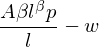

In [21]:
foc = sm.diff(objective_subs,l)
foc

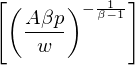

In [22]:
sol = sm.solve(foc,l)
sol

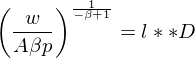

In [33]:
demand = sm.Eq(((w/(A*beta*p))**(1/(1-beta))),d)
demand

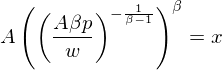

In [24]:
budget_constraint_sol = budget_constraint.subs(l,sol[0])
budget_constraint_sol

**The consumer side**

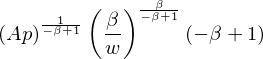

In [68]:
objective_2 = (1 - beta)*(A*p)**(1/(1 - beta))*(beta/w)**(beta/(1 - beta))
objective_2

Function

In [55]:
x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
delta = sm.symbols('delta')
alpha = sm.symbols('alpha')

f = sm.log(x1)+sm.log(x2)
_f = sm.lambdify((x1,x2),f)
f

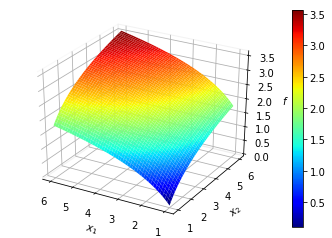

In [58]:
# a. grids
x1_vec = np.linspace(1,6,500)
x2_vec = np.linspace(1,6,500)
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij')
f_grid = _f(x1_grid,x2_grid)

# b. main
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.plot_surface(x1_grid,x2_grid,f_grid,cmap=cm.jet)

# c. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f$')

# d. invert xaxis
ax.invert_xaxis()

# e. remove background
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# f. add colorbar
fig.colorbar(cs);